In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [2]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: C:\Users\PlayHard\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [4]:
image_data = hdu_list[0].data

In [5]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [6]:
hdu_list.close()

In [7]:
image_data = fits.getdata(image_file)

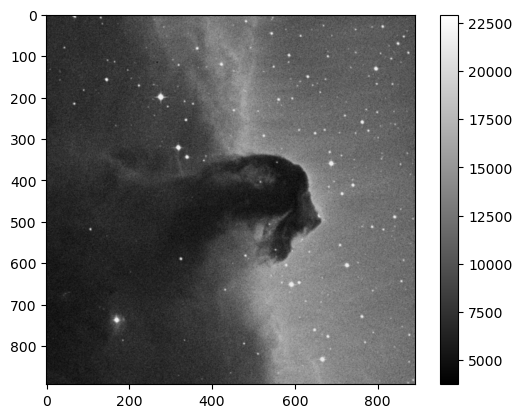

In [9]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [10]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


In [11]:
def load_fits(filename):
  hdulist = fits.open(filename)
  data = hdulist[0].data

  arg_max = np.argmax(data)  
  max_pos = np.unravel_index(arg_max, data.shape)
  
  return max_pos


In [13]:
#function that loads in a FITS file and finds the position of the brightest pixel (i.e. the maximum value) in its image data. 
bright = load_fits(image_file)
print(bright)

(71, 850)


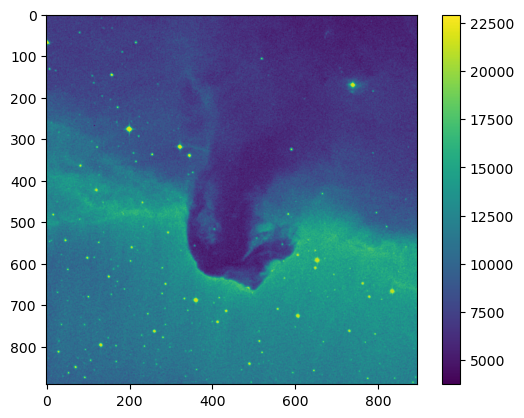

In [14]:
 # You can also confirm your result visually:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open(image_file)
data = hdulist[0].data

# Plot the 2D image data
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()